<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_AAPL_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-02-27 13:08:15--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.163.102, 142.251.163.101, 142.251.163.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j8qd92hqc9tbmcoj6dccjar0pqcq5722/1677503250000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=278a4793-f2bf-4b36-b7e2-f698305a4c97 [following]
--2023-02-27 13:08:18--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j8qd92hqc9tbmcoj6dccjar0pqcq5722/1677503250000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=278a4793-f2bf-4b36-b7e2-f698305a4c97
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to do

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/aapl_2008_Q2_20080423發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
1,Inc.,0.0,0.0,proper noun,root,False,False,False,False
2,(,0.0,0.0,punctuation,punctuation,False,False,True,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
4,:,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9506,everyone,0.0,0.0,pronoun,direct object,True,True,False,False
9507,for,0.0,0.0,adposition,prepositional modifier,True,True,False,False
9508,their,0.0,0.0,pronoun,possession modifier,True,True,False,False
9509,participation,0.0,0.0,noun,object of preposition,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9511 entries, 0 to 9510
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          9511 non-null   object 
 1   Polarity      9511 non-null   float64
 2   Subjectivity  9511 non-null   float64
 3   Pos_          9511 non-null   object 
 4   Dep_          9510 non-null   object 
 5   Alpha         9511 non-null   bool   
 6   Stopword      9511 non-null   bool   
 7   Punct         9511 non-null   bool   
 8   Num           9511 non-null   bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 408.8+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
5,AAPL,0.0,0.0,proper noun,appositional modifier,True,False,False,False
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
10,April,0.0,0.0,proper noun,noun phrase as adverbial modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9497,conclude,0.0,0.0,verb,root,True,False,False,False
9498,today,0.0,0.0,noun,possession modifier,True,False,False,False
9500,conference,0.0,0.0,noun,compound,True,False,False,False
9505,thank,0.0,0.0,verb,root,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
15,PM,0.0,0.0,noun,appositional modifier,True,False,False,False
16,ETExecutivesNancy,0.0,0.0,noun,appositional modifier,True,False,False,False
105,day,0.0,0.0,noun,conjunct,True,False,False,False
109,welcome,0.8,0.9,verb,conjunct,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9497,conclude,0.0,0.0,verb,root,True,False,False,False
9498,today,0.0,0.0,noun,possession modifier,True,False,False,False
9500,conference,0.0,0.0,noun,compound,True,False,False,False
9505,thank,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
117,quarterly,0.0,0.0,adjective,adjectival modifier,True,False,False,False
127,recorded,0.0,0.0,verb,root,True,False,False,False
140,like,0.0,0.0,verb,root,True,False,False,False
160,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False
166,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9462,financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False
9471,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False
9492,Thanks,0.2,0.2,noun,root,True,False,False,False
9497,conclude,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
117,quarterly,0.0,0.0,adjective,adjectival modifier,True,False,False,False
160,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False
166,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
221,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
223,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9433,available,0.4,0.4,adjective,adjectival complement,True,False,False,False
9436,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False
9448,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False
9462,financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    639.000000
mean       0.087671
std        0.227668
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.136364
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    639.000000
mean       0.293506
std        0.336326
min        0.000000
25%        0.000000
50%        0.100000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
117,quarterly,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
160,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
166,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
221,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
223,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
9433,available,0.4,0.4,adjective,adjectival complement,True,False,False,False,Positive,Subjective
9436,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False,Negative,Subjective
9448,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
9462,financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,61
1,Neutral,Objective,305
2,Neutral,Subjective,89
3,Positive,Subjective,184


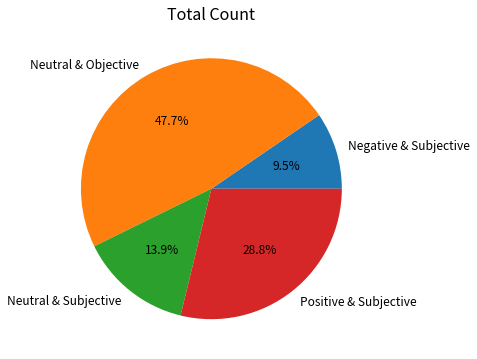

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q2 斷詞分析由 Neutral & Objective占多數**

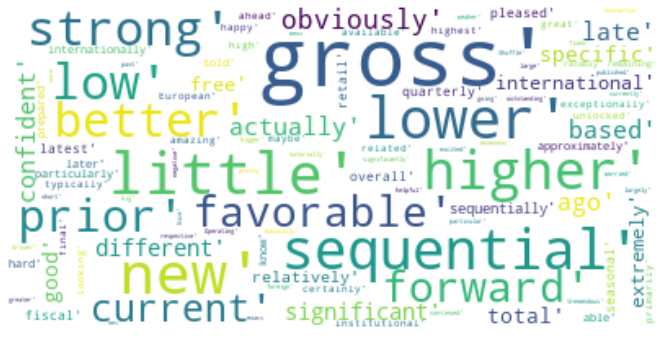

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Apple Inc. (NASDAQ:AAPL),0.000000,0.000000
1,"F2Q08 Earnings Call April 23, 2008 5:00 PM ETE...",0.114286,0.128571
2,Today’s call is being recorded.,0.000000,0.000000
3,At this time for opening remarks and introduct...,0.000000,0.000000
4,Please go ahead.,0.000000,0.000000
...,...,...,...
364,Members of the press with additional questions...,0.000000,0.000000
365,Joan is at 408-974-4570 and I am at 408-974-5420.,0.000000,0.000000
366,Thanks again.,0.200000,0.200000
367,OperatorThat does conclude today’s conference ...,0.000000,0.000000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    369.000000
mean       0.116087
std        0.200810
min       -0.400000
25%        0.000000
50%        0.000000
75%        0.202857
max        0.910000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    369.000000
mean       0.308861
std        0.283037
min        0.000000
25%        0.000000
50%        0.297321
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Apple Inc. (NASDAQ:AAPL),0.000000,0.000000,Neutral,Objective
1,"F2Q08 Earnings Call April 23, 2008 5:00 PM ETE...",0.114286,0.128571,Positive,Subjective
2,Today’s call is being recorded.,0.000000,0.000000,Neutral,Objective
3,At this time for opening remarks and introduct...,0.000000,0.000000,Neutral,Objective
4,Please go ahead.,0.000000,0.000000,Neutral,Objective
...,...,...,...,...,...
364,Members of the press with additional questions...,0.000000,0.000000,Neutral,Objective
365,Joan is at 408-974-4570 and I am at 408-974-5420.,0.000000,0.000000,Neutral,Objective
366,Thanks again.,0.200000,0.200000,Positive,Subjective
367,OperatorThat does conclude today’s conference ...,0.000000,0.000000,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,37
1,Neutral,Objective,112
2,Neutral,Subjective,47
3,Positive,Subjective,173


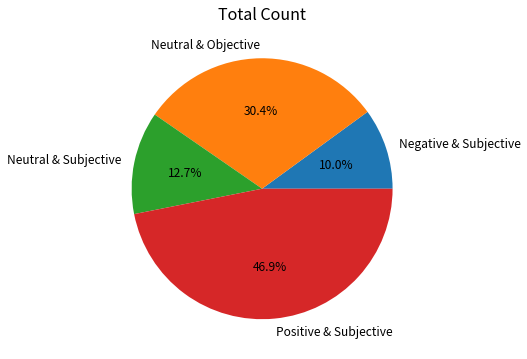

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q2 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)Please note that some of the information you will hear during our discussion today may consist of forward-looking statements regarding revenue, gross margin, operating expenses, other income and expense, stock-based compensation expense, taxes, earnings and future products.

2)We are extremely pleased to have shipped 2.29 million Macs, just shy of the record number of Macs we sold this past holiday quarter and representing 51% growth over the prior March quarter’s results.

3)With an average of 205 stores opened during the quarter, average revenue per store was $7.1 million, compared to $4.8 million in the year-ago quarter, an increase of 48%.

4)OI&E was $162 million, below our guidance due to the lower interest rate environment.

5)The tax rate for the quarter was about 29%, below the expected 32% due to higher foreign earnings and lower interest income.

6)We expect the tax rate for the second half of fiscal 2008 to be 31%.

7)For the quarter, we are targeting revenue of about $7.

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)Apple Inc. (NASDAQ:AAPL)

2)Today’s call is being recorded.

3)At this time for opening remarks and introductions, I would like to turn the call over to Nancy Paxton, Senior Director Investor Relations and Corporate Finance.

4)Please go ahead.

5)Nancy PaxtonThank you.

6)Speaking today is Apple CFO Peter Oppenheimer and he’ll be joined by Apple COO Tim Cook and Treasurer Gary Wipfler for the Q&A session with analysts.

7)And with that, I would like to turn the call over to Peter Oppenheimer for introductory remarks.

8)Peter OppenheimerThank you, Nancy and thank you for joining us.

9)Net income was $1.05 billion, which was up 36% over the prior March quarter’s results and translated to earnings per share of $1.16.

10)We ended the quarter with between three and four weeks of Mac channel inventory.

11)We began and ended the quarter within our target range of four to six weeks of iPod channel inventory.

12)Our movie rental service has been well-received by customers and we have al

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)Actual results or trends could differ materially from our forecasts.

2)Apple assumes no obligation to update any forward-looking statements or information which speak as of their respective dates.

3)And finally, our U.S. education business generated Mac unit growth of 35% year over year, its highest growth rate in any quarter in the last eight years.

4)I would now like to talk about our Mac products and services, which represented 59% of total quarterly revenue.

5)Now I would like to discuss our music products and services, which accounted for 36% of total revenue during the quarter.

6)Total revenue recognized during the quarter from sales of iPhone, iPhone accessories, and payments from carriers was $378 million.

7)Total deferred revenue from iPhone and Apple TV was $1.93 billion at the end of the March quarter, compared to $1.44 billion at the end of the December quarter.

8)The revenue and cost of sales associated with these iPhones will be recognized ratably over the remain

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)F2Q08 Earnings Call April 23, 2008 5:00 PM ETExecutivesNancy Paxton - Senior Director, Investor Relations and Corporate FinancePeter Oppenheimer - Chief Financial Officer, Senior Vice PresidentTimothy D. Cook - Chief Operating OfficerGary Wipfler - TreasurerAnalystsBen Reitzes - Lehman Brothers Bill Fearnley - FTN MidwestMike Abramsky - RBC Capital MarketsDavid Bailey - Goldman SachsKaty Huberty - Morgan StanleyRichard Gardner - CitigroupAndrew Neff - Bear StearnsGene Munster - Piper JaffrayShannon Cross - Cross ResearchKeith Bachman - Bank of MontrealShaw Wu - American Technology ResearchJeff Fidacaro - Merrill LynchToni Sacconaghi - Sanford BernsteinCharles Wolf - Needham & CompanyOperatorGood day, everyone and welcome to this Apple Incorporated second quarter 2008 quarterly results conference call.

2)Good afternoon and thanks to everyone for joining us.

3)For more information, please refer to the risk factors discussed in Apple's Form 10-K for 2007, the Form 10-Q for the first q

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

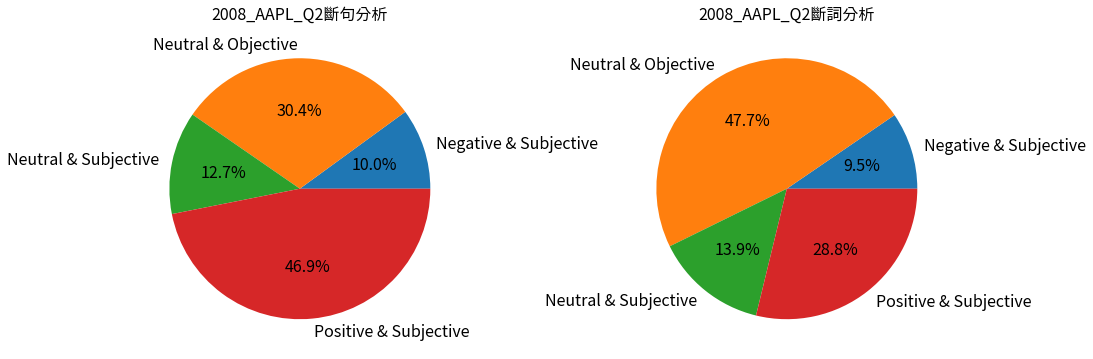

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]


axs[1].pie(size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[1].set_title('2008_AAPL_Q2斷詞分析', fontsize=16)


axs[0].pie(_size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[0].set_title('2008_AAPL_Q2斷句分析', fontsize=16)


plt.savefig("2008_AAPL_Q2.png")
from google.colab import files
files.download("2008_AAPL_Q2.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/2008斷詞、斷句code/2008_AAPL_Q2'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/2008斷詞、斷句code/2008_AAPL_Q2 to html
[NbConvertApp] Writing 833665 bytes to /content/drive/MyDrive/大數據專題/大數據/2008斷詞、斷句code/2008_AAPL_Q.html
